# Imports

In [49]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

#from sklearn.datasets import make_blobs, make_moons
#from sklearn.cluster import DBSCAN
#from sklearn.metrics import silhouette_score

# Cargar datos

* Creo path (recordar montaar el drive)

In [50]:
path = "/content/drive/MyDrive/Colab Notebooks/Platzi_ML/04_Clustering/05_Proyecto/data.csv"

* Cargo data

In [51]:
df_country = pd.read_csv(path)

* Verifiquemos que se cargo bien

In [52]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Limpieza/Preprocesado de la data

## Manejo de nulos

* Validemos nulos

In [53]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Manejo de duplicados

* Validemos duplicados

In [54]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Detección de outliers (análisis de la distribución)

* Vamos a sacar columnas de tipo objeto

In [55]:
int_cols = df_country.select_dtypes(exclude= 'object').columns
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

* Iteremos sobre columnas numéricas para sacr su box plot

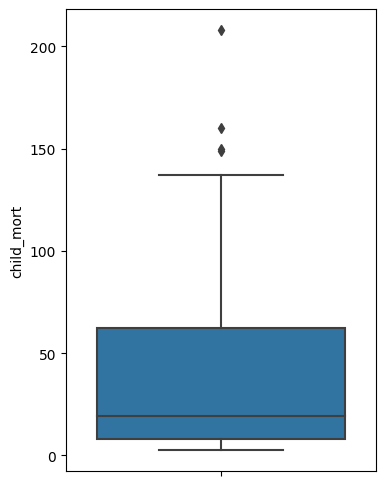

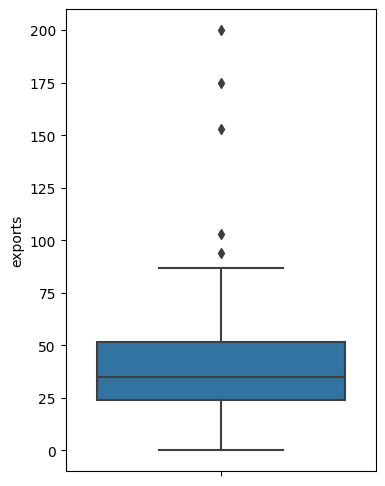

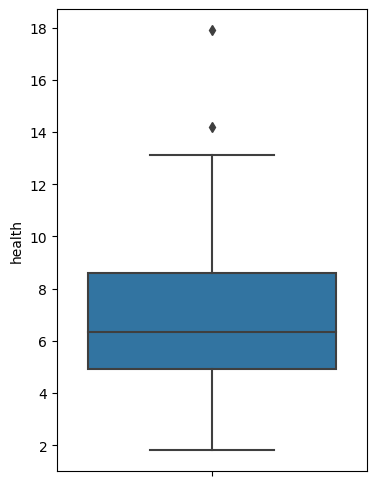

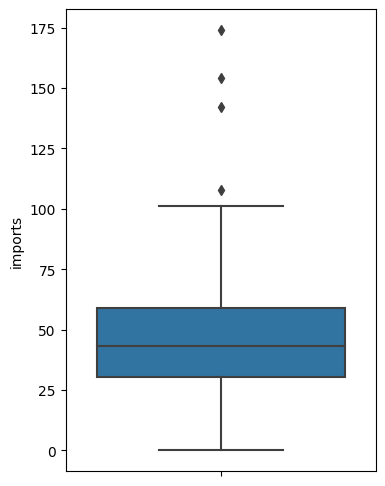

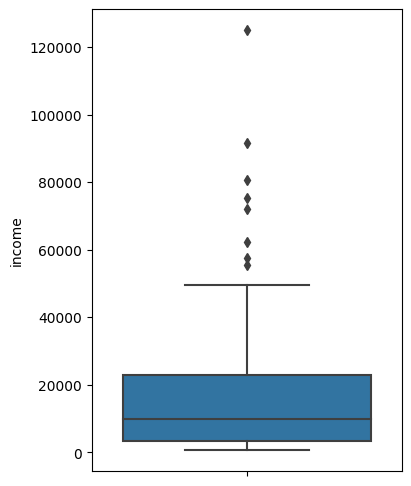

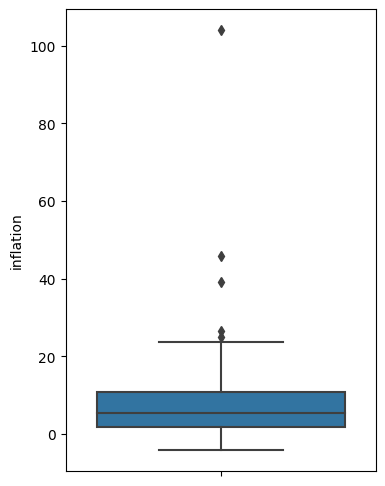

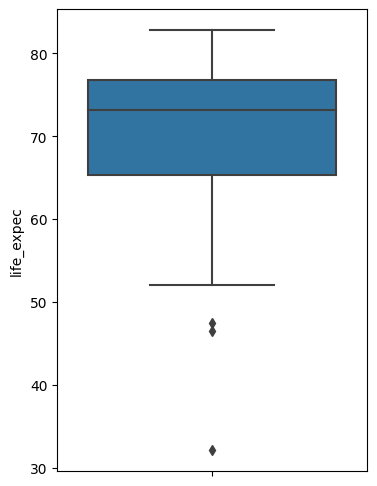

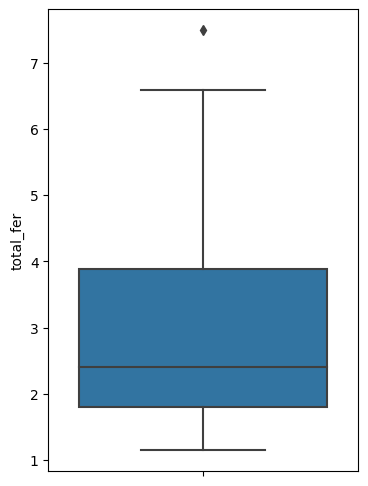

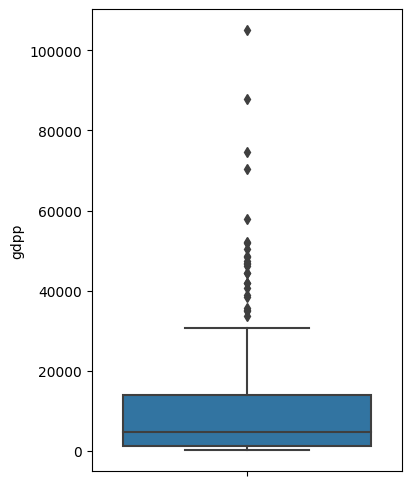

In [56]:
for _ in int_cols:
  plt.figure(figsize=(4,6))
  sns.boxplot(data=df_country, y = _)
  plt.show()
  # vemos que son pocos los outliers, pero no los eliminemos. 
  # Solo la inflación hay un outlier muy grande, pero hace parte de la economía del pais,
  # hace parte de kla economía del país, no valdría eliminarlo

* Heatmap de correlación de outliers

<ipython-input-57-597c6bf8f58b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_country.corr(), annot = True, cmap='coolwarm')


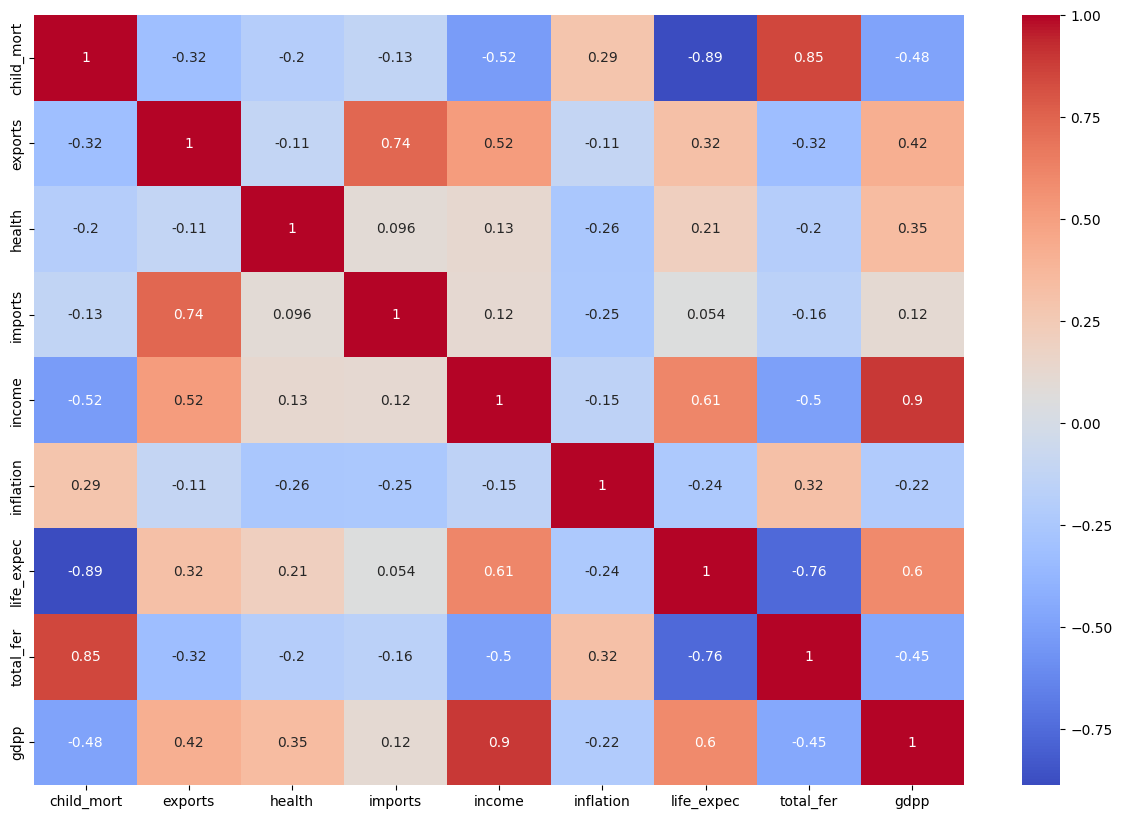

In [57]:
fig = plt.figure(figsize = (15,10))
sns.heatmap(df_country.corr(), annot = True, cmap='coolwarm')
plt.show()

#income y gdpp (producto per capita), muy correlacionados.
#expectativa de vida y total fer, tambien muy correlacionadas
#mortalidad infantil y totalfer.

#de momento no eliminaremos ninguna

* Escalado de datos

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#escalar y quito nombres de paises, pues sobran
df_country_scaled = scaler.fit_transform(df_country.drop('country', axis=1))

In [59]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns = df_country.drop('country', axis=1).columns)
df_country_scaled.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623


## PCA (Reducción de dimensionalidad)

## Aplicación

* Imports

In [60]:
from sklearn.decomposition import PCA

* Instancio pca

In [61]:
pca = PCA()

* Aplico PCA

In [62]:
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

* Evaluemos ratio de varianza

In [63]:
var = pca.explained_variance_ratio_
var

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

* Grafiquemos la suma acumulado

Text(0, 0.5, '% Variance')

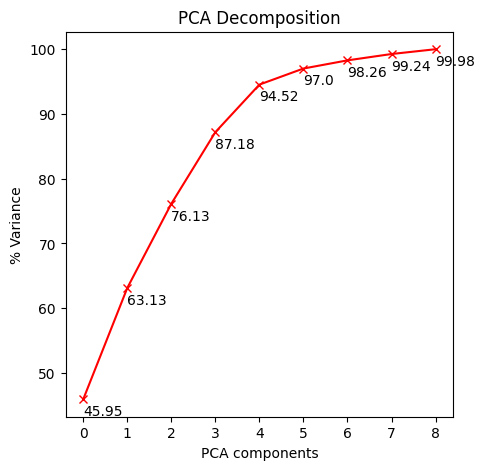

In [64]:
# obtengamos la varianza acumulada, con vuatro decimales, y en %
accum_var = np.cumsum(np.round(var, decimals=4)*100)

#sino pordia hcr un simple plt.plot(accum_var)
components = list(range(0,9))
plt.figure(figsize=(5,5))
for s,d in zip(components,accum_var):
    plt.annotate(np.round(d,decimals=2), xy=(s,d-2.5))

plt.plot(components,accum_var, 'r-x')
plt.title("PCA Decomposition")
plt.xlabel('PCA components')
plt.ylabel('% Variance')

* Selecciónde número de Features

In [65]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8], axis =1, inplace = True)
pca_data_standard.head(2)

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059


# ENTRENAMIENTO PROYECTO

## Imports

In [66]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN #entrenar
from sklearn.metrics import silhouette_score # medir
from scipy.cluster.hierarchy import dendrogram, linkage #dendrograma

## K-MEANS (sobre DS con y sin PCA)

### Con PCA

* No sabemos k, lo desconocemos, vamos a iterar sobre multiples k's

In [67]:
Sum_of_squared_distance = [] #para grfica codo
silhouette_scores = [] #para grafica indices de silueta
K = range(2,15)

for _ in K:
  km = KMeans(n_clusters= _) #creamos modelo
  y = km.fit_predict(pca_data_standard) #predecimos
  Sum_of_squared_distance.append(km.inertia_) #suma de distancais para grafica de codo
  silhouette_scores.append(silhouette_score(pca_data_standard, y)) #s_core de pca vs y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

* Grafiquemos los resultados para el codo

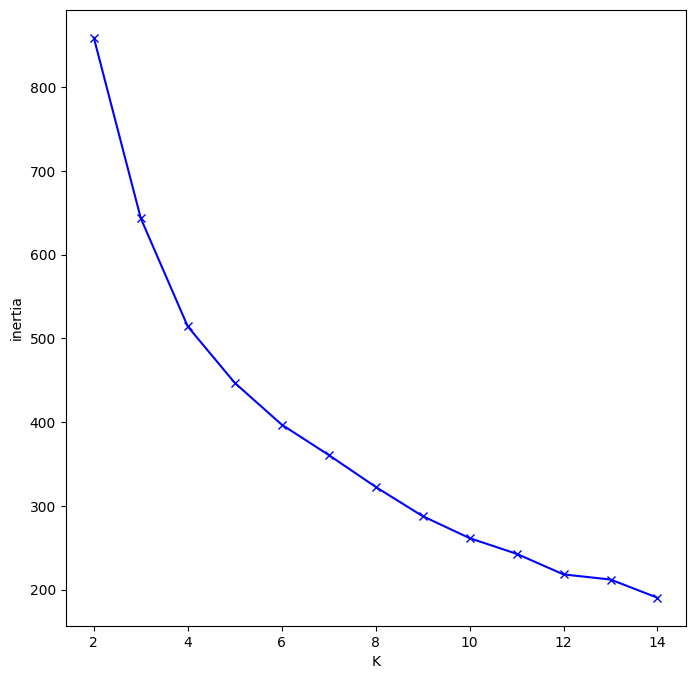

In [68]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distance, 'bx-') #kvs datos para el codo
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

#codo se ve como entre 4-5

* Grafiquemos los resultados para silueta

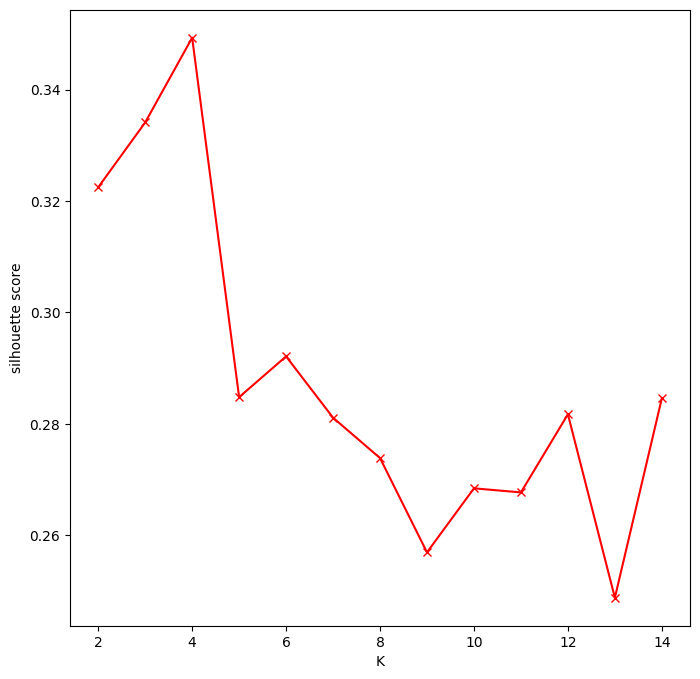

In [69]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-') #kvs datos para el codo
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

#se ve que se maximiza en 4

* Entrenamos con 4 clusters

In [70]:
km = KMeans(n_clusters= 4) #creamos modelo
y = km.fit_predict(pca_data_standard) #predecimos

print(silhouette_score(pca_data_standard, y)) #pca vs y

#meto resultado en df
df_country['k_means_pca'] = y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3522170843293593


### Sin PCA

In [71]:
Sum_of_squared_distance = [] #para grfica codo
silhouette_scores = [] #para grafica indices de silueta
K = range(2,15)

for _ in K:
  km = KMeans(n_clusters= _) #creamos modelo
  y = km.fit_predict(df_country_scaled) #predecimos
  Sum_of_squared_distance.append(km.inertia_) #suma de distancais para grafica de codo
  silhouette_scores.append(silhouette_score(df_country_scaled, y)) #s_core de pca vs y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

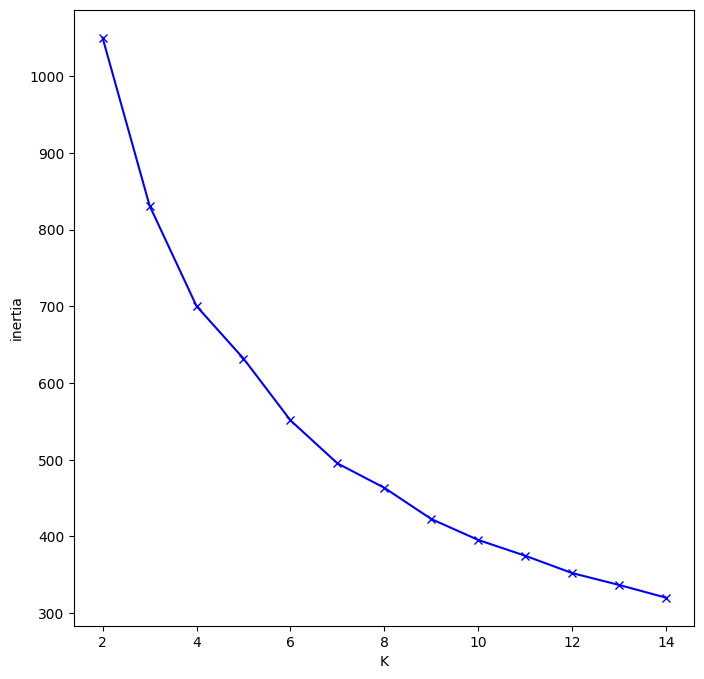

In [72]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distance, 'bx-') #kvs datos para el codo
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

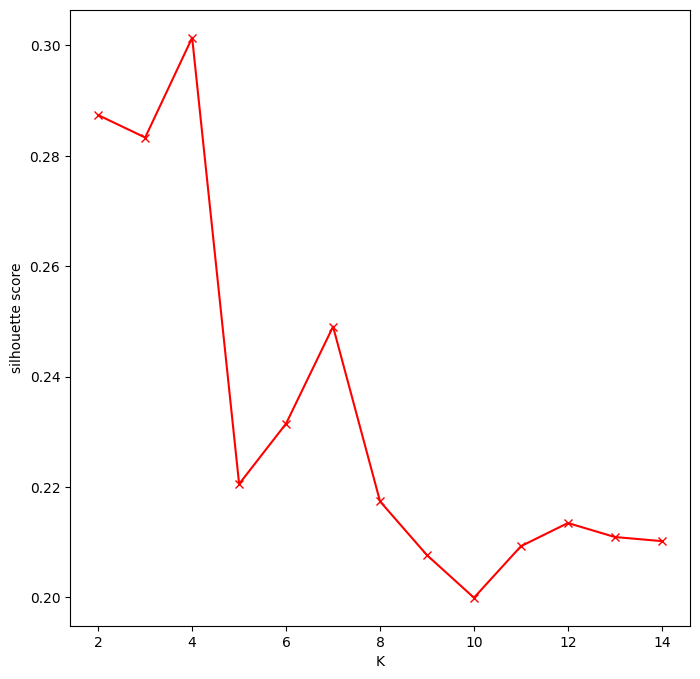

In [73]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-') #kvs datos para el codo
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

#aqui tambien con 4

In [74]:
km = KMeans(n_clusters= 4) #creamos modelo
y = km.fit_predict(df_country_scaled) #predecimos

print(silhouette_score(df_country_scaled, y)) #pca vs y

#meto resultado en df 
df_country['k_means'] = y

#preores resultados, vemos que reduccion de dim, si funciona

0.301375962376881


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Hierarchical Clustering

### Con PCA

* Ejecutemos dendograma

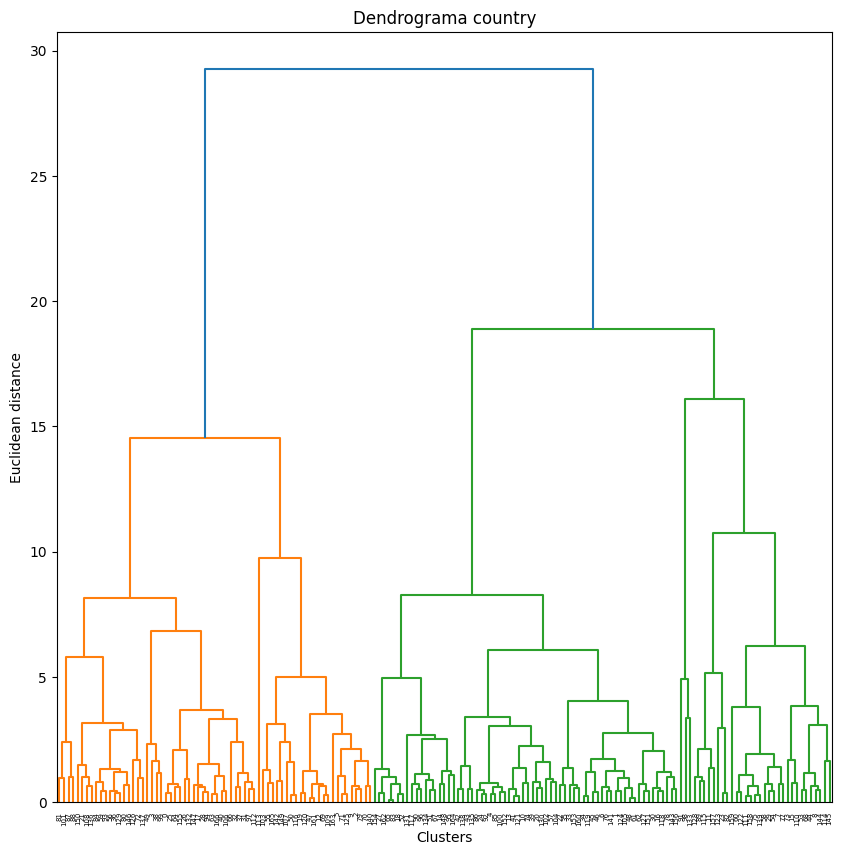

In [75]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method = 'ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.title('Dendrograma country')
plt.show()

# sen 2 clusters muy separados (paises que les va bien y mal, y también con 3 hay buena separacion)

* Vamos a hacer clustering con 2 y 3, para probar

In [76]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage ='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))

#guardo en df los clusters, dejamos con2, que tiene mayor coeff de silueta
df_country['hc_pca'] = y_hc

0.3070110704080526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Sin PCA

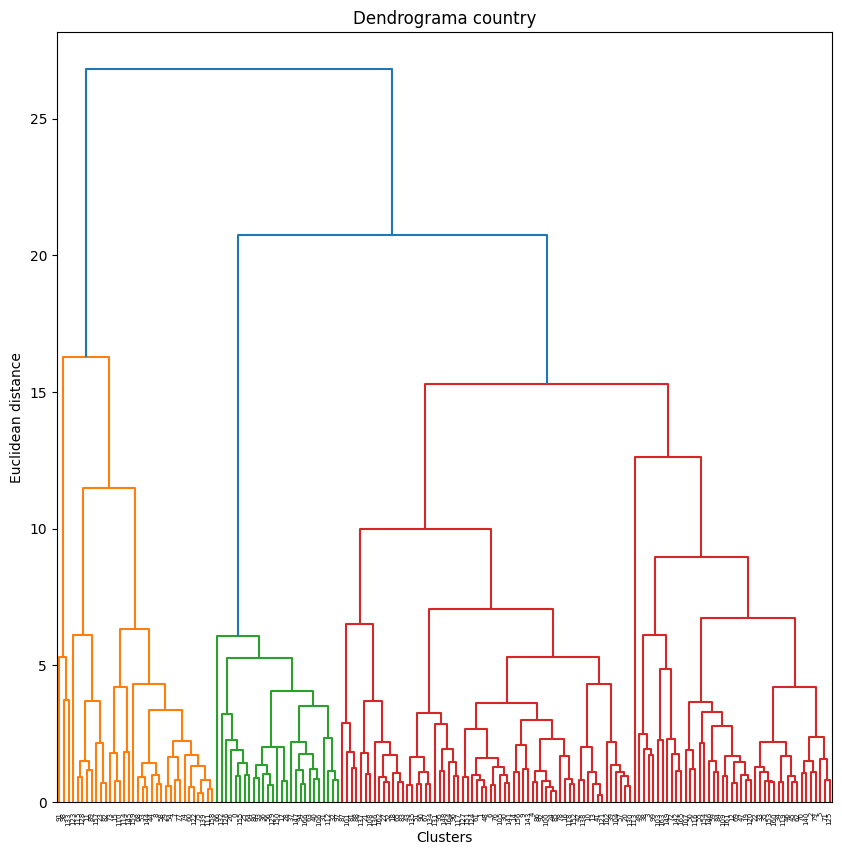

In [77]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_country_scaled, method = 'ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.title('Dendrograma country')
plt.show()
#vemos que entre 3 y 2 esta bein, para 4 muy poca dsitancia en y

In [78]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage ='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_hc))

#guardo en df los clusters, dejamos con2, que tiene mayor coeff de silueta, aqui fue mejor sin pca
df_country['hc'] = y_hc

0.3153134331018189


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## DBSCAN

### Con PCA

* Calculemos Epsilon y el numero de putnos

In [79]:
from sklearn.neighbors import NearestNeighbors

#Solo calcularemos con el vecino mas cercano
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)#fit del vecino mas cercano
distances, indices = neighbors_fit.kneighbors(pca_data_standard)#guardo en distancias asi como sus indices

* Grafica de las distancias (rodilla)

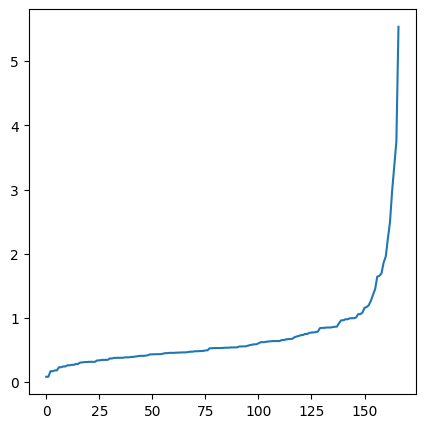

In [80]:
distances = np.sort(distances, axis =0)
distances = distances[:,1] #tomo el valor del mas cernano

fig = plt.figure(figsize=(5,5))
plt.plot(distances)

#esta por ahí entre 0.5-2

* Creemos ahora el set de datos

In [81]:
eps_values = np.arange(0.5, 2.0, 0.10)
min_samples = np.arange(3,12) #4dimensiones/features

* Iteramos sobre la combinatoria de los productos

In [82]:
from itertools import product
dbscan_params = list(product(eps_values, min_samples)) #dcombinatorioa cruzada
no_of_clusters = []
sil_score = []

for p in dbscan_params:
  #predigo
  y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
  ##llenoemos indices de silueta y numeros de clusters
  try:
    sil_score.append(silhouette_score(pca_data_standard, y_dbscan)) #indice prediccion vs pca
    
  except:
    sil_score.append(0)
  
  no_of_clusters.append(len(np.unique(y_dbscan)))

* Pivots para verlo matricialmente y evvaluar

In [83]:
df_param_tunning = pd.DataFrame.from_records(dbscan_params, columns= ['eps', 'min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [84]:
pivot_1 = pd.pivot_table(df_param_tunning, values = 'sil_score', columns='eps', index = 'min_samples')
#pivot 2 pero para el numero de clusters ejecutados
pivot_2 = pd.pivot_table(df_param_tunning, values = 'n_clusters', columns='eps', index = 'min_samples')

* Grafiquemos

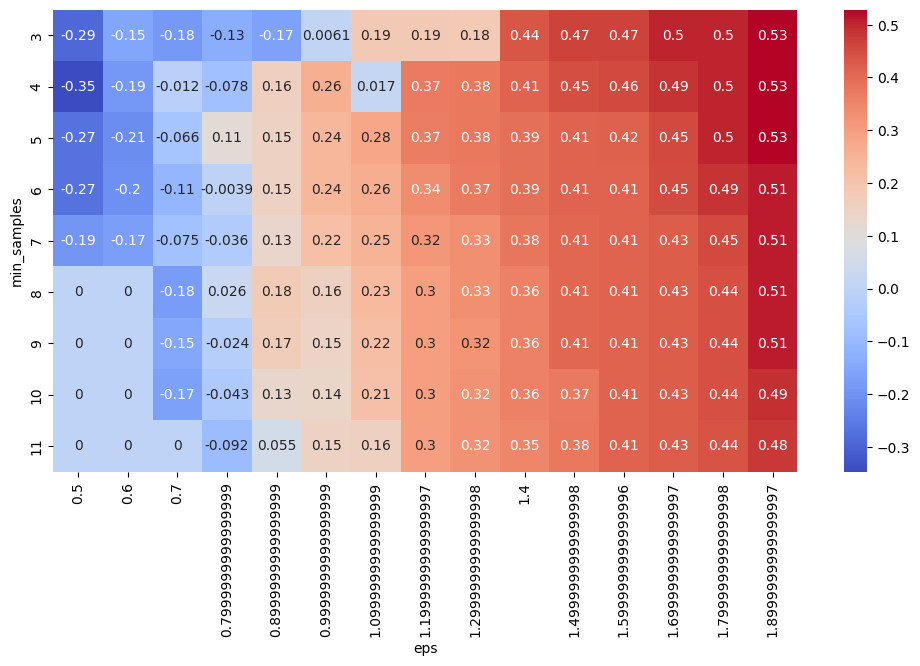

In [85]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot = True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

#para ejemplos de 3,4,5 y eps de 1.8, tengo altos sil_score 

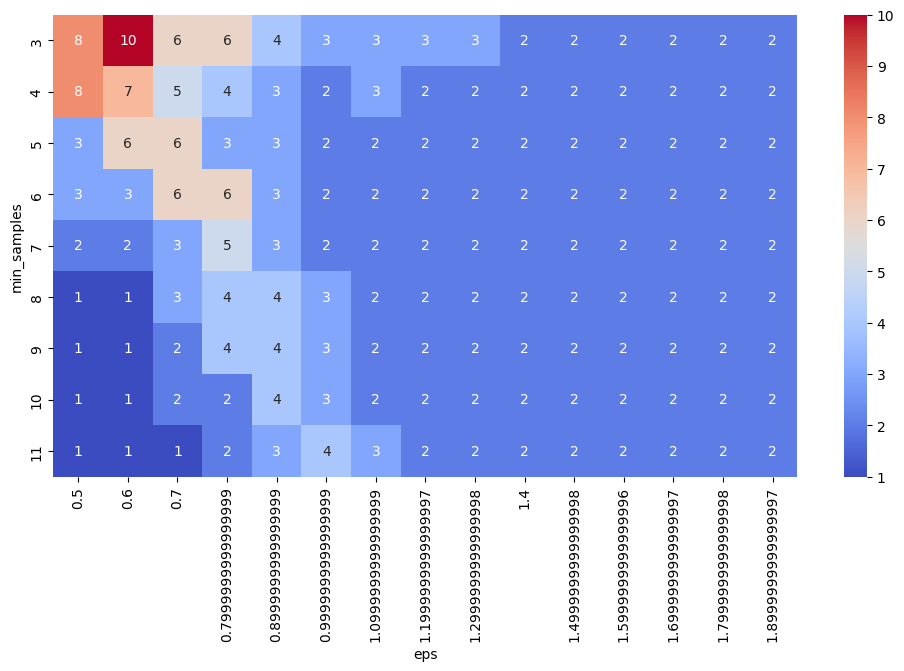

In [86]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_2, annot = True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()
#esto corresponde al numero de los clusters usados, y son bajos, muy bajos (2, uno podria ser el cluster y otros ruido)
#esto no sirve aunque el indice de silueta sea muy alto

#por lo mismo busco mas o menos uno que tnga unos 3 clustrs y un alto sil_score

* Seleccione y graifco

In [87]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_dbscan))

#guardo en df los clusters, dejamos con2, que tiene mayor coeff de silueta, aqui fue mejor sin pca
df_country['dbscan_pca'] = y_dbscan

0.18591175730784343


### Sin PCA

In [88]:
#Solo calcularemos con el vecino mas cercano
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaled)#fit del vecino mas cercano
distances, indices = neighbors_fit.kneighbors(df_country_scaled)#guardo en distancias asi como sus indices

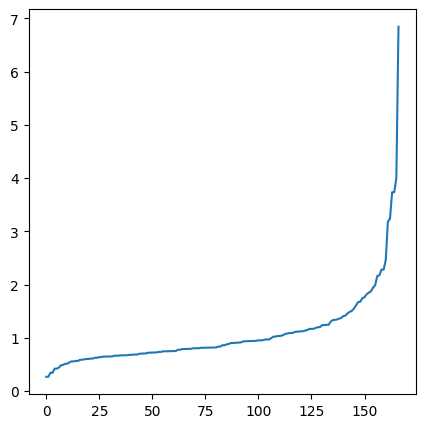

In [89]:
distances = np.sort(distances, axis =0)
distances = distances[:,1] #tomo el valor del mas cernano

fig = plt.figure(figsize=(5,5))
plt.plot(distances)

#esta por ahí entre 1-3 (rango del epsilon)

In [90]:
eps_values = np.arange(1, 3.0, 0.10)
min_samples = np.arange(3,12) #4dimensiones/features, ejempsllo o minimos vecinos

In [91]:
from itertools import product
dbscan_params = list(product(eps_values, min_samples)) #dcombinatorioa cruzada
no_of_clusters = []
sil_score = []

for p in dbscan_params:
  #predigo
  y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
  ##llenoemos indices de silueta y numeros de clusters
  try:
    sil_score.append(silhouette_score(df_country_scaled, y_dbscan)) #indice prediccion vs pca
    
  except:
    sil_score.append(0)
  
  no_of_clusters.append(len(np.unique(y_dbscan)))

In [92]:
df_param_tunning = pd.DataFrame.from_records(dbscan_params, columns= ['eps', 'min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [93]:
pivot_1 = pd.pivot_table(df_param_tunning, values = 'sil_score', columns='eps', index = 'min_samples')
#pivot 2 pero para el numero de clusters ejecutados
pivot_2 = pd.pivot_table(df_param_tunning, values = 'n_clusters', columns='eps', index = 'min_samples')

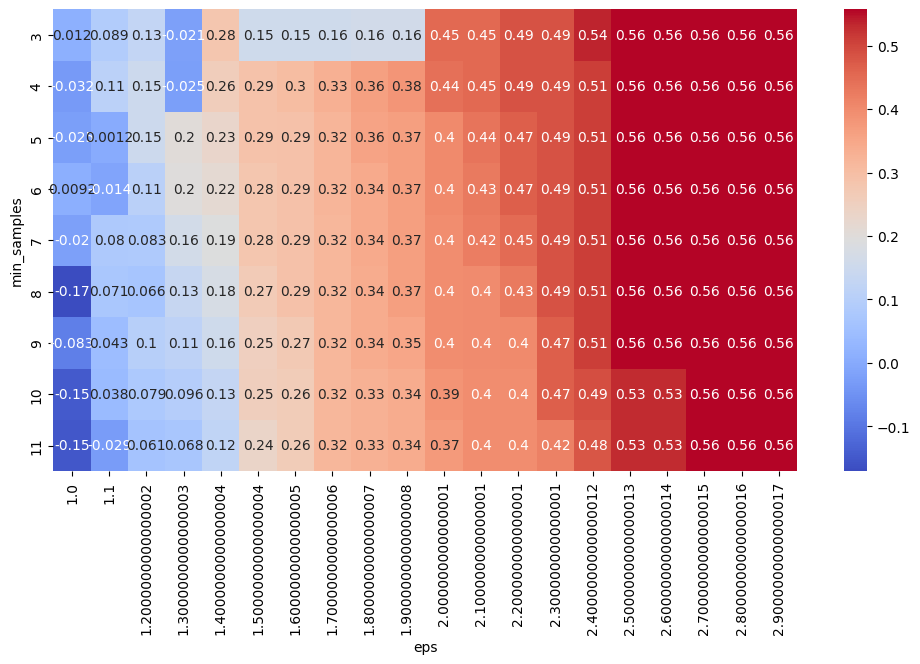

In [94]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot = True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

#aumenta el epsilon, pero genera menos clusters

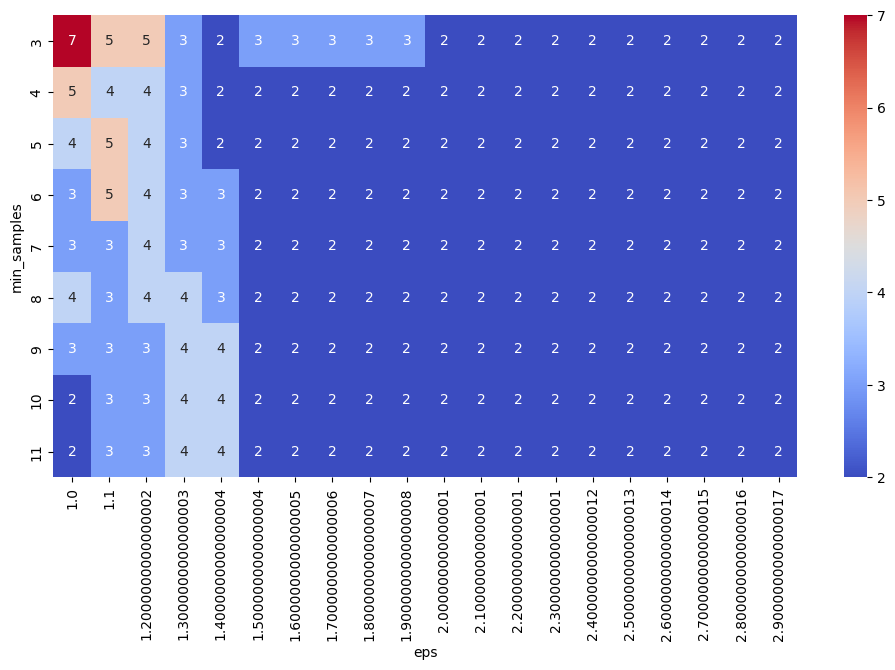

In [95]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_2, annot = True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()
#buscaremos unos 3 clusters

In [97]:
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_dbscan))

#guardo en df los clusters, dejamos con2, que tiene mayor coeff de silueta, aqui fue mejor sin pca
df_country['dbscan'] = y_dbscan

0.1563549566374231


# Evaluación de resultados (en k_means_ca, que tuvo mayor índice de silueta, y por tanto mejor agrupación)

* df_country, tiene resultados de todo

In [98]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,0,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,0,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,0,0,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,1,1,0,0,0


* Pairplot (no tomo valores categóricos, ademas, mejores resultados estuvieron con k_means_pca, asi que descarto las otras mientras)

In [99]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan'],
      dtype='object')

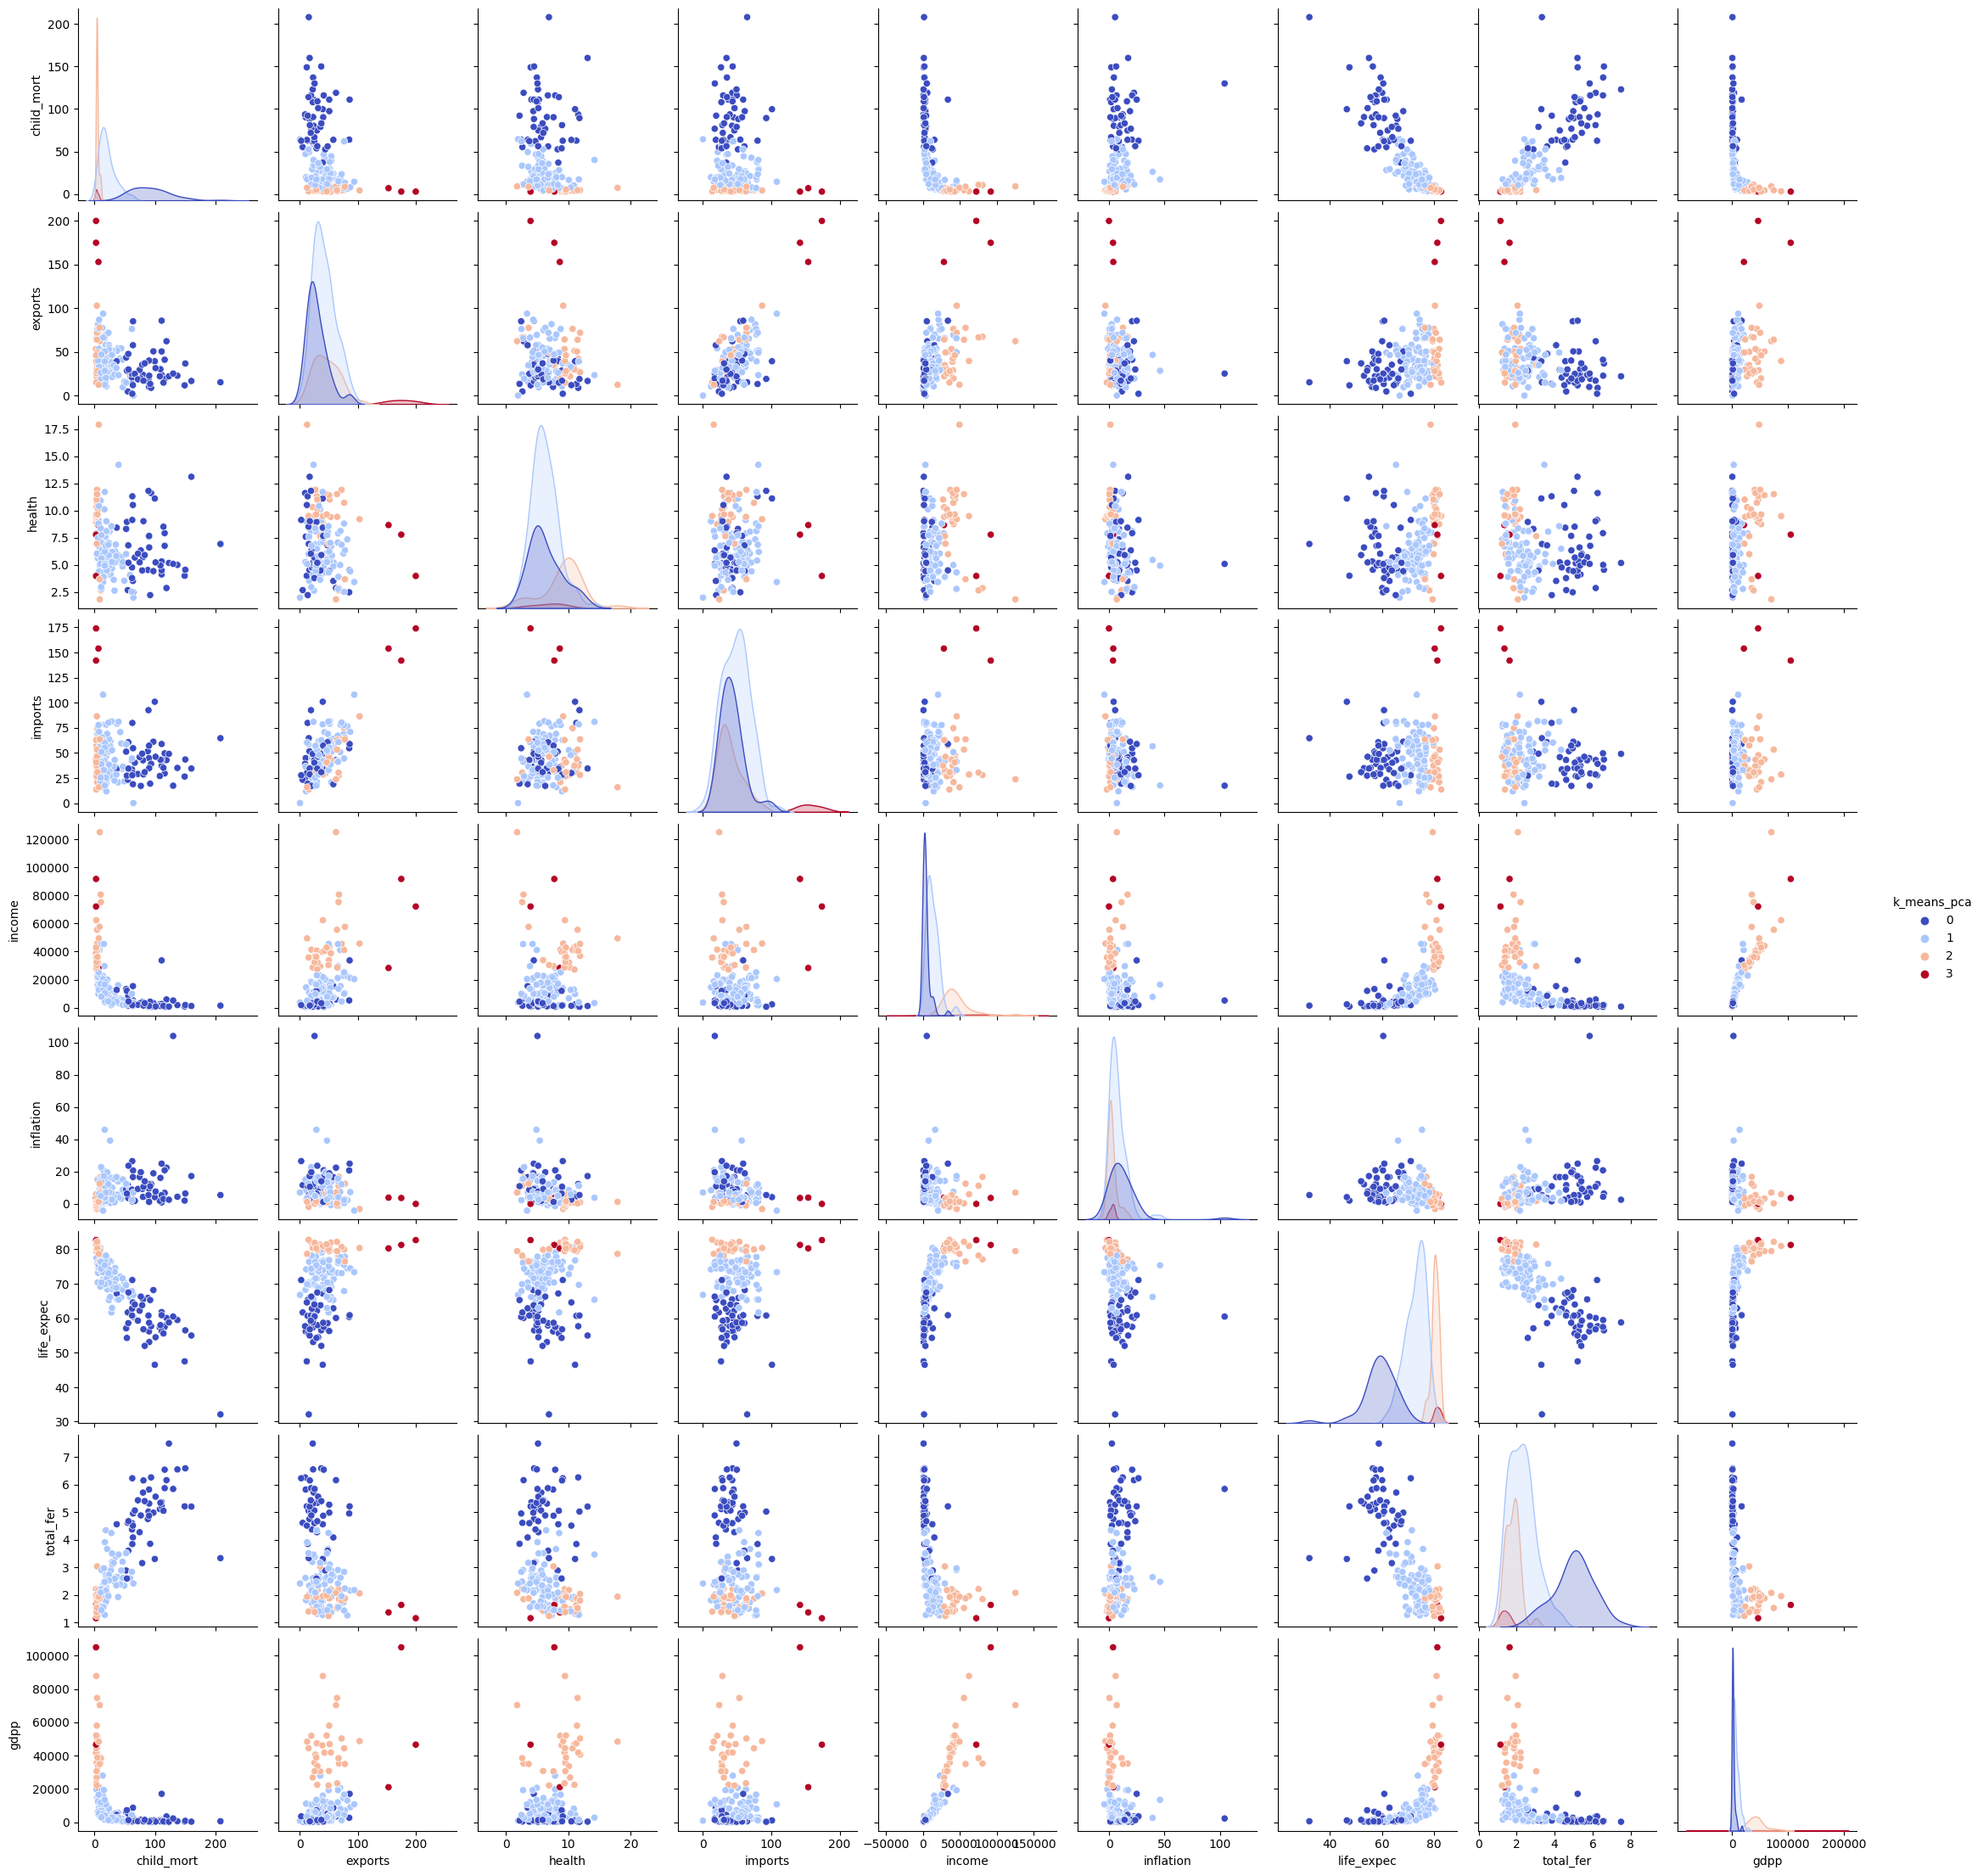

In [100]:
sns.pairplot(data = df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue ='k_means_pca', palette='coolwarm' )

#se ve una separabilidad visual, al menos en graficos 2D, tiene sentido los grupos

* Scatter separado entre índice de mortalidad infantil vs gdpp

<Axes: xlabel='child_mort', ylabel='gdpp'>

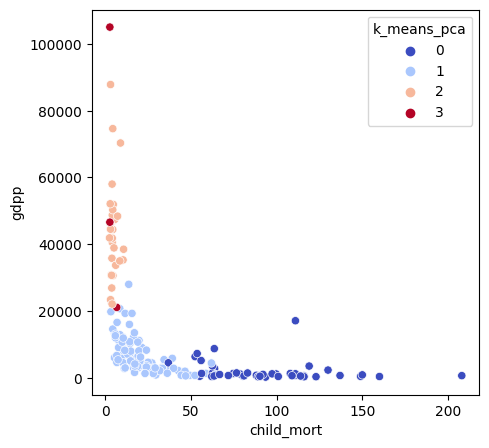

In [102]:
fig = plt.figure(figsize=(5,5))
sns.scatterplot(data=df_country, x='child_mort', y ='gdpp', hue='k_means_pca', palette = 'coolwarm')

* Hagamos una comparación allí más expreimental, miremos que paises están en grupos (análisis de clusters, requiere conocimiento del negocio)

In [107]:
df_country[df_country['k_means_pca'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,3,0,1,0,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,3,0,1,0,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2,3,0,1,0,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2,3,0,1,-1,-1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2,3,0,1,0,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2,3,0,0,0,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2,3,0,1,0,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2,3,0,1,0,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,2,3,0,1,0,0
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,2,3,0,1,0,0
